<a href="https://colab.research.google.com/github/Prishn3113/Codsoft_DS_Internship/blob/main/IrisFlowerClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **IRIS FLOWER CLASSIFICATION**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import load_iris

In [ ]:
# Load the Iris dataset
iris = load_iris()
# Create a DataFrame
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['/content/IRIS.csv'] = iris.target


In [ ]:
print(iris_df.head())



   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   /content/IRIS.csv  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  


In [ ]:
print(iris_df.describe())


       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  /content/IRIS.csv  
count        150.000000         150.000000  
mean           1.199333           1.000000  
std            0.762238           0.819232  
min            0.100000           0.000000  
25%            0.300000           0.000000  
50%            1.300000           1.000000  
75%            1.800000           2.000000  
max            2.500000           2.000000  


In [ ]:
print(iris_df['/content/IRIS.csv'].value_counts())

/content/IRIS.csv
0    50
1    50
2    50
Name: count, dtype: int64


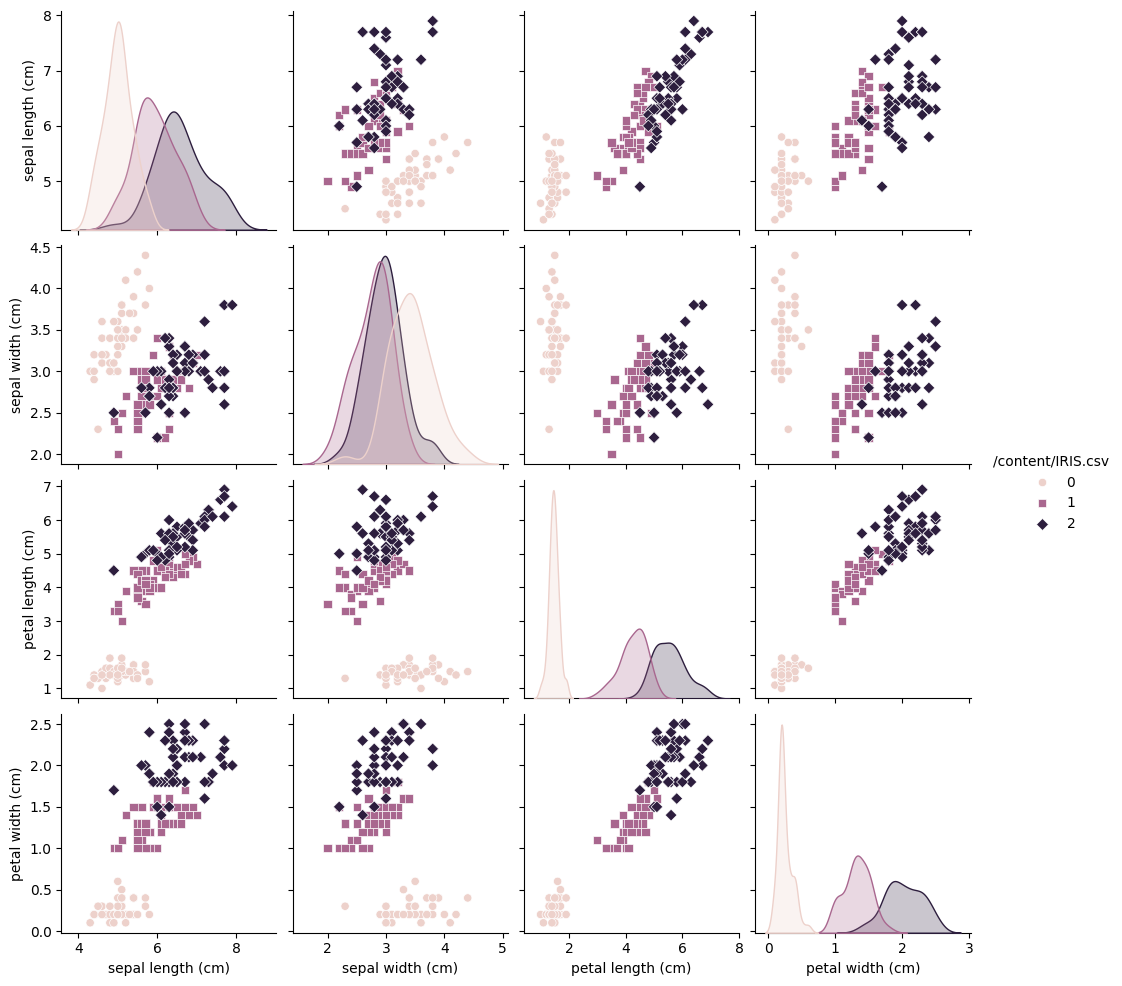

In [ ]:
sns.pairplot(iris_df, hue='/content/IRIS.csv', markers=["o", "s", "D"])
plt.show()


In [ ]:
# Splitting the dataset into training and testing sets
X = iris_df.drop(columns='/content/IRIS.csv')
y = iris_df['/content/IRIS.csv']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Make predictions
y_pred = knn.predict(X_test)

# Evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



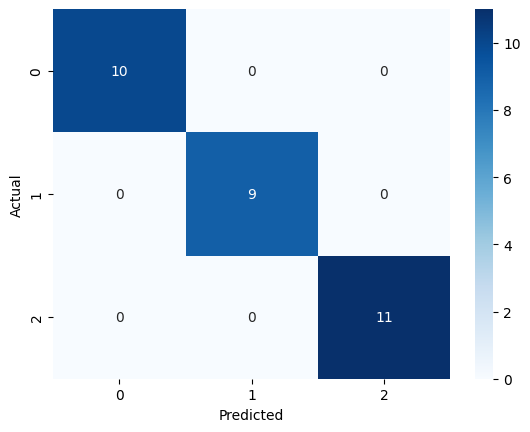

In [ ]:
# Confusion matrix heatmap
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
